### How to Clean a messy warehouse data 

### 1 a)import Libraries    

In [723]:
#import the pandas library
import pandas as pd
#import seaborn as sns
import seaborn as sns
#import matplotlib library
import matplotlib.pyplot as plt
#import numpy library
import numpy as np

### b)Reading dataset from our csv file

In [724]:
#Lets read the data from csv file and create a dataframe to be used
df =  pd.read_csv('data/warehouse_messy_data.csv')
#preview the first five and last five rows by calling the df
df

,Product ID,Product Name,Category,Warehouse,Location,Quantity,Price,Supplier,Status,Last Restocked
0,1102,gadget y,ELECTRONICS,Warehouse 2,Aisle 1,300,9.99,Supplier C,In Stock,NaN
1,1435,gadget y,ELECTRONICS,Warehouse 2,Aisle 4,two hundred,19.99,Supplier C,Out of Stock,NaN
2,1860,widget a,CLOTHING,Warehouse 2,Aisle 3,100,19.99,Supplier B,In Stock,20/12/2022
3,1270,gadget z,TOYS,Warehouse 2,Aisle 4,50,49.99,Supplier B,In Stock,20/12/2022
4,1106,widget a,FURNITURE,Warehouse 3,Aisle 3,two hundred,9.99,Supplier D,Out of Stock,25/04/2023
...,...,...,...,...,...,...,...,...,...,...
995,1009,widget b,FURNITURE,Warehouse 2,Aisle 2,100,NaN,Supplier C,In Stock,15/01/2023
996,1823,gadget y,ELECTRONICS,Warehouse 2,Aisle 3,300,19.99,Supplier B,In Stock,20/12/2022
997,1797,gadget z,TOYS,Warehouse 3,Aisle 5,150,9.99,Supplier C,Low Stock,05/03/2023
998,1241,widget c,FURNITURE,Warehouse 2,Aisle 2,100,49.99,Supplier C,Low Stock,20/12/2022


### c)Acessing information about our dataset

In [725]:
#getting to know about our dataset by accessing its information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product ID      1000 non-null   int64  
 1   Product Name    1000 non-null   object 
 2   Category        1000 non-null   object 
 3   Warehouse       1000 non-null   object 
 4   Location        1000 non-null   object 
 5   Quantity        842 non-null    object 
 6   Price           793 non-null    float64
 7   Supplier        1000 non-null   object 
 8   Status          1000 non-null   object 
 9   Last Restocked  800 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 78.2+ KB


### d)Accessing summary statistics about our data

In [726]:
#statistics for int and float objects
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Product ID,1000.0,1503.929000,289.998108,1000.00,1242.75,1505.00,1757.25,1998.00
Price,793.0,28.085839,14.686312,9.99,19.99,29.99,49.99,49.99


In [727]:
#statistics  for string objects
df.describe(include='O')

,Product Name,Category,Warehouse,Location,Quantity,Supplier,Status,Last Restocked
count,1000,1000,1000,1000,842,1000,1000,800
unique,6,4,3,5,5,4,3,4
top,gadget y,FURNITURE,Warehouse 1,Aisle 3,300,Supplier B,In Stock,20/12/2022
freq,177,265,349,211,177,288,340,218


### 2.Cleaning our dataset
### a)Cleaning our column names

In [728]:
#check our columns
df.columns

Index(['Product ID', 'Product Name', 'Category', 'Warehouse', 'Location',
       'Quantity', 'Price', 'Supplier', 'Status', 'Last Restocked'],
      dtype='object')

In [729]:
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['Product_ID', 'Product_Name', 'Category', 'Warehouse', 'Location',
       'Quantity', 'Price', 'Supplier', 'Status', 'Last_Restocked'],
      dtype='object')

### b)Check for missing values and how to handle them

In [730]:
df.columns[df.isna().any()] # see columns with missing values

Index(['Quantity', 'Price', 'Last_Restocked'], dtype='object')

In [731]:
#lets check by how many
df.isna().sum()

Product_ID          0
Product_Name        0
Category            0
Warehouse           0
Location            0
Quantity          158
Price             207
Supplier            0
Status              0
Last_Restocked    200
dtype: int64

In [732]:
#1. Quantity column
df['Quantity'].value_counts(dropna=False)

300            177
150            175
50             169
100            161
two hundred    160
NaN            158
Name: Quantity, dtype: int64

In [733]:
''' 
Data entry issues where 200 is written as two hundred
Need to convert the column to int
'''
#replace two hundred with 200
df['Quantity'] = df['Quantity'].str.replace('two hundred','200')
#conver column to float
df['Quantity'] = df['Quantity'].astype(float)
#check value counts again
df['Quantity'].value_counts(dropna=False)

300.0    177
150.0    175
50.0     169
100.0    161
200.0    160
NaN      158
Name: Quantity, dtype: int64

0.3787833111883261

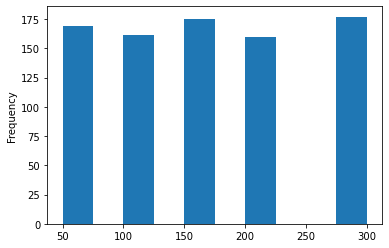

In [734]:
#check for skewness using histogram
df['Quantity'].plot(kind='hist')
df['Quantity'].skew() # has positive skew, replace with median

In [735]:
quantity_median = df['Quantity'].median()
df['Quantity'].fillna(quantity_median,inplace=True)
#check missing values again
df['Quantity'].isna().sum() # has zero missing so we good

0

0.3869429855327663

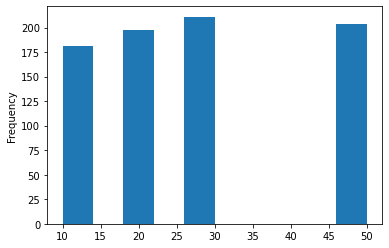

In [736]:
#2. Price column
df['Price'].value_counts(dropna=False,normalize=True)
#check hist
df['Price'].plot(kind='hist')
df['Price'].skew()

In [737]:
#replace NaN with median
#check median
price_median = df['Price'].median()
#replace with median
df['Price'].fillna(price_median, inplace=True)
#check if all NaN values are filled
df['Price'].isna().sum()

0

In [738]:
#2. Last_Restocked column
df['Last_Restocked'].value_counts(dropna=False) 

20/12/2022    218
NaN           200
15/01/2023    199
25/04/2023    192
05/03/2023    191
Name: Last_Restocked, dtype: int64

In [739]:
#df.dropna(subset='Last_Restocked',inplace=True) #we cant fill dates so we can drop these rows#tutorial replaced with todays date
#check if dropped
#convert to date
df['Last_Restocked'] = pd.to_datetime(df['Last_Restocked'],errors='coerce')
df['Last_Restocked'].fillna(pd.to_datetime('today'), inplace=True)
df['Last_Restocked'].value_counts(dropna=False) 
df['Last_Restocked'].isna().sum()

c:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '20/12/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '25/04/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/01/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)


0

In [740]:
#tutorials code for handling missing values
# Fill NaN values with a default value or strategy, here we use mean for numeric columns 
df['Quantity'].fillna(df['Quantity'].mean(), inplace=True) 
df['Price'].fillna(df['Price'].mean(), inplace=True) 

# Fill NaN values for categorical columns with a placeholder or most frequent value 
df['Product_Name'].fillna('Unknown Product', inplace=True) 
df['Category'].fillna('Unknown Category', inplace=True) 
df['Warehouse'].fillna(df['Warehouse'].mode()[0], inplace=True) 
df['Location'].fillna('Unknown Location', inplace=True) 
df['Supplier'].fillna(df['Supplier'].mode()[0], inplace=True) 
df['Status'].fillna(df['Status'].mode()[0], inplace=True) 
#df['Last_Restocked'].fillna(pd.to_datetime('today'), inplace=True)

### c)Check our categorical variables

In [741]:
df['Product_Name'].unique() #strip spaces

array([' gadget y ', ' widget a ', ' gadget z ', ' widget b ',
       ' widget c ', ' gadget x '], dtype=object)

In [742]:
# we can strip trailing and leading spaces for all string columns -spaces cause mismatch in analyses
for col in df.select_dtypes(include='O').columns:# df.select_dtypes('O')
    df[col]= df[col].str.strip()

In [743]:
#df['Product_Name'] = df['Product_Name'].str.strip()
df['Product_Name'].str.strip().unique()

array(['gadget y', 'widget a', 'gadget z', 'widget b', 'widget c',
       'gadget x'], dtype=object)

In [744]:
df['Category'].unique() 

array(['ELECTRONICS', 'CLOTHING', 'TOYS', 'FURNITURE'], dtype=object)

In [745]:
df['Warehouse'].unique() #looks okay

array(['Warehouse 2', 'Warehouse 3', 'Warehouse 1'], dtype=object)

In [746]:
df['Location'].unique() #looks okay

array(['Aisle 1', 'Aisle 4', 'Aisle 3', 'Aisle 5', 'Aisle 2'],
      dtype=object)

In [747]:
df['Supplier'].unique() #looks okay

array(['Supplier C', 'Supplier B', 'Supplier D', 'Supplier A'],
      dtype=object)

In [748]:
### Standardising Text formats- inconsistent text formatting can make it difficult to group and analyse data.we need to standardise by
#1.Convert product name to proper title
df['Product_Name'] = df['Product_Name'].str.title()
#correct category column
df['Category'] = df['Category'].str.capitalize()

In [749]:
df['Status'].value_counts() #looks okay

In Stock        340
Out of Stock    332
Low Stock       328
Name: Status, dtype: int64

### d)Check duplicates 

In [750]:
df.duplicated().sum() # no duplicates

0

### e)Check outliers

In [751]:
df.describe()

,Product_ID,Quantity,Price
count,1000.000000,1000.000000,1000.000000
mean,1503.929000,159.600000,28.480000
std,289.998108,79.932654,13.099294
min,1000.000000,50.000000,9.990000
25%,1242.750000,100.000000,19.990000
50%,1505.000000,150.000000,29.990000
75%,1757.250000,200.000000,29.990000
max,1998.000000,300.000000,49.990000


<AxesSubplot:ylabel='Quantity'>

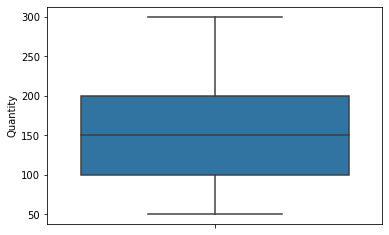

In [752]:
#check outlier in quantity
sns.boxplot(data=df, y='Quantity') # no outlier here

<AxesSubplot:ylabel='Price'>

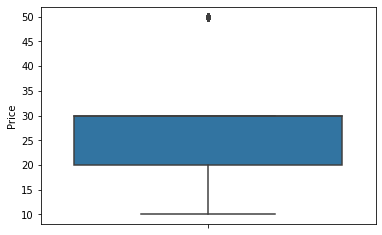

In [753]:
#check outlier in Price
sns.boxplot(data=df, y='Price') 

In [754]:
#check this outlier
df.query('Price > 30')

,Product_ID,Product_Name,Category,Warehouse,Location,Quantity,Price,Supplier,Status,Last_Restocked
3,1270,Gadget Z,Toys,Warehouse 2,Aisle 4,50.0,49.99,Supplier B,In Stock,2022-12-20
6,1700,Widget A,Clothing,Warehouse 2,Aisle 2,200.0,49.99,Supplier B,In Stock,2022-12-20
10,1466,Widget A,Clothing,Warehouse 3,Aisle 1,150.0,49.99,Supplier B,In Stock,2023-01-15
13,1458,Widget C,Furniture,Warehouse 2,Aisle 3,300.0,49.99,Supplier A,Low Stock,2023-05-03
15,1372,Gadget Y,Furniture,Warehouse 2,Aisle 1,200.0,49.99,Supplier A,Low Stock,2023-05-03
...,...,...,...,...,...,...,...,...,...,...
962,1647,Gadget X,Electronics,Warehouse 2,Aisle 2,150.0,49.99,Supplier C,Out of Stock,2022-12-20
965,1177,Widget C,Electronics,Warehouse 3,Aisle 2,300.0,49.99,Supplier B,In Stock,2023-01-15
975,1144,Gadget Z,Toys,Warehouse 1,Aisle 1,50.0,49.99,Supplier B,In Stock,2023-04-25
998,1241,Widget C,Furniture,Warehouse 2,Aisle 2,100.0,49.99,Supplier C,Low Stock,2022-12-20


In [755]:
#check this outlier using IQR
Q1, Q3 = df['Price'].quantile([0.25,0.75])
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3+ 1.5*IQR
df.query('Price<@lower_bound | Price>@upper_bound')

,Product_ID,Product_Name,Category,Warehouse,Location,Quantity,Price,Supplier,Status,Last_Restocked
3,1270,Gadget Z,Toys,Warehouse 2,Aisle 4,50.0,49.99,Supplier B,In Stock,2022-12-20
6,1700,Widget A,Clothing,Warehouse 2,Aisle 2,200.0,49.99,Supplier B,In Stock,2022-12-20
10,1466,Widget A,Clothing,Warehouse 3,Aisle 1,150.0,49.99,Supplier B,In Stock,2023-01-15
13,1458,Widget C,Furniture,Warehouse 2,Aisle 3,300.0,49.99,Supplier A,Low Stock,2023-05-03
15,1372,Gadget Y,Furniture,Warehouse 2,Aisle 1,200.0,49.99,Supplier A,Low Stock,2023-05-03
...,...,...,...,...,...,...,...,...,...,...
962,1647,Gadget X,Electronics,Warehouse 2,Aisle 2,150.0,49.99,Supplier C,Out of Stock,2022-12-20
965,1177,Widget C,Electronics,Warehouse 3,Aisle 2,300.0,49.99,Supplier B,In Stock,2023-01-15
975,1144,Gadget Z,Toys,Warehouse 1,Aisle 1,50.0,49.99,Supplier B,In Stock,2023-04-25
998,1241,Widget C,Furniture,Warehouse 2,Aisle 2,100.0,49.99,Supplier C,Low Stock,2022-12-20


In [756]:
df.query('Price == 49.99')

,Product_ID,Product_Name,Category,Warehouse,Location,Quantity,Price,Supplier,Status,Last_Restocked
3,1270,Gadget Z,Toys,Warehouse 2,Aisle 4,50.0,49.99,Supplier B,In Stock,2022-12-20
6,1700,Widget A,Clothing,Warehouse 2,Aisle 2,200.0,49.99,Supplier B,In Stock,2022-12-20
10,1466,Widget A,Clothing,Warehouse 3,Aisle 1,150.0,49.99,Supplier B,In Stock,2023-01-15
13,1458,Widget C,Furniture,Warehouse 2,Aisle 3,300.0,49.99,Supplier A,Low Stock,2023-05-03
15,1372,Gadget Y,Furniture,Warehouse 2,Aisle 1,200.0,49.99,Supplier A,Low Stock,2023-05-03
...,...,...,...,...,...,...,...,...,...,...
962,1647,Gadget X,Electronics,Warehouse 2,Aisle 2,150.0,49.99,Supplier C,Out of Stock,2022-12-20
965,1177,Widget C,Electronics,Warehouse 3,Aisle 2,300.0,49.99,Supplier B,In Stock,2023-01-15
975,1144,Gadget Z,Toys,Warehouse 1,Aisle 1,50.0,49.99,Supplier B,In Stock,2023-04-25
998,1241,Widget C,Furniture,Warehouse 2,Aisle 2,100.0,49.99,Supplier C,Low Stock,2022-12-20


In [757]:
df.query('Price == 49.99 & Category=="ELECTRONICS"') #leave outlier as is

,Product_ID,Product_Name,Category,Warehouse,Location,Quantity,Price,Supplier,Status,Last_Restocked


In [758]:
df['Product_Name'].unique()

array(['Gadget Y', 'Widget A', 'Gadget Z', 'Widget B', 'Widget C',
       'Gadget X'], dtype=object)

In [759]:
df.to_csv('data/cleaned_warehouse.csv',index=False)

### EDA- will help uncover patterns ,detect anomalies and gain insights from data Using the warehouse dataset, the EDA involved creating visualizations of products,price ranges,
### stock status and relationship between quantity and price
### in addition, the frequency of restocking events by different suppliers was examined to identity potential trends or inconsisities in the supply chain 

In [760]:
#Import cleaned dataset
df1 = pd.read_csv('data/cleaned_warehouse.csv')
df1

,Product_ID,Product_Name,Category,Warehouse,Location,Quantity,Price,Supplier,Status,Last_Restocked
0,1102,Gadget Y,Electronics,Warehouse 2,Aisle 1,300.0,9.99,Supplier C,In Stock,2024-09-12 07:54:41.921721
1,1435,Gadget Y,Electronics,Warehouse 2,Aisle 4,200.0,19.99,Supplier C,Out of Stock,2024-09-12 07:54:41.921721
2,1860,Widget A,Clothing,Warehouse 2,Aisle 3,100.0,19.99,Supplier B,In Stock,2022-12-20 00:00:00.000000
3,1270,Gadget Z,Toys,Warehouse 2,Aisle 4,50.0,49.99,Supplier B,In Stock,2022-12-20 00:00:00.000000
4,1106,Widget A,Furniture,Warehouse 3,Aisle 3,200.0,9.99,Supplier D,Out of Stock,2023-04-25 00:00:00.000000
...,...,...,...,...,...,...,...,...,...,...
995,1009,Widget B,Furniture,Warehouse 2,Aisle 2,100.0,29.99,Supplier C,In Stock,2023-01-15 00:00:00.000000
996,1823,Gadget Y,Electronics,Warehouse 2,Aisle 3,300.0,19.99,Supplier B,In Stock,2022-12-20 00:00:00.000000
997,1797,Gadget Z,Toys,Warehouse 3,Aisle 5,150.0,9.99,Supplier C,Low Stock,2023-05-03 00:00:00.000000
998,1241,Widget C,Furniture,Warehouse 2,Aisle 2,100.0,49.99,Supplier C,Low Stock,2022-12-20 00:00:00.000000


In [761]:
df1.isna().sum()

Product_ID        0
Product_Name      0
Category          0
Warehouse         0
Location          0
Quantity          0
Price             0
Supplier          0
Status            0
Last_Restocked    0
dtype: int64

### 1.Distribution of products across categories


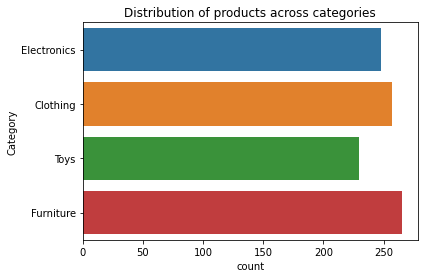

In [762]:
sns.countplot(data=df,y='Category')
plt.title('Distribution of products across categories') ;#There seems to be a slight variation in the number of products across categories as illustrsted below.The furniture category 
#has the heaviest stock, indicating their popularity or demand, while toys have lowest or fewer products

### 2.Price Distribution

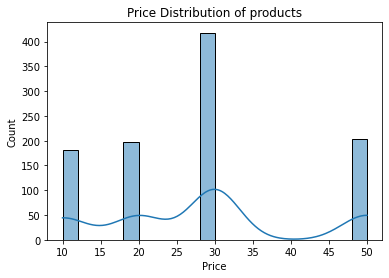

In [763]:
sns.histplot(df['Price'],kde=True)
plt.title('Price Distribution of products');#the prices are distributed within a specific range, primariry clustering around the average price of $28 as can be observed below.This suggests
#a standard pricing strategy with a few high-priced items

### 3.Stock Status Distribution


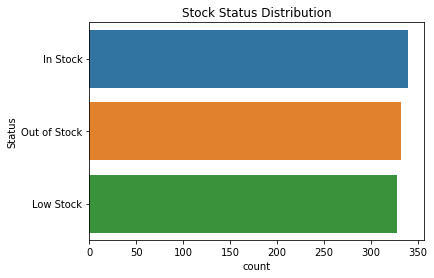

In [764]:
sns.countplot(data=df,y='Status')
plt.title('Stock Status Distribution') ;#A slight majority of products seem to be in stock, but a siginifant portion is out of stock, which cld indicate
#supply chain issues or high demand

### 4.Relationship between Quantity and Price


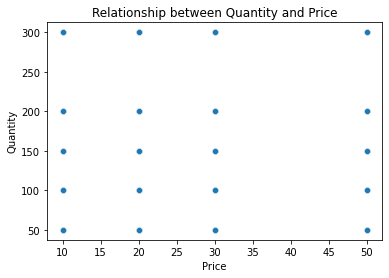

In [765]:
sns.scatterplot(data=df,x='Price',y='Quantity')
plt.title('Relationship between Quantity and Price') ; #There seems to be no clear relationship between quantity and price as seen below, indicating the stcoking startegy might not be 
#directly influenced by price but rather by other factors such as demand or supploer constraint

In [766]:
np.corrcoef(df['Quantity'],df['Price'])[0][1]

-0.048760330357771414

### 1.Frequency of Restocking Events by Supplier

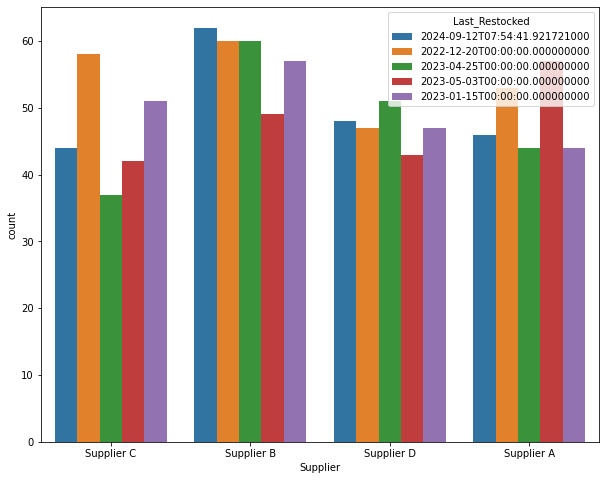

In [767]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='Supplier',hue='Last_Restocked');#The frequency of restocking varies by supplier.All suppliers seem to be having multiple restocking events which suggests amore frequent supply
#chain connection or higher demand for their products

### Detailed analysis of the warehouse data
### A. Stock Analysis 
Stock analysis focused on understanding the availability of products across differenet categories, identifying out-of-stock products and analysing restock patterns

We identified categories with higher average stock levels, highlighted products that were frequently out of tock and examined the restocking frequency of various suppliers

### Stock Analysis Insights:
### 1. Average Quantity per Product Category

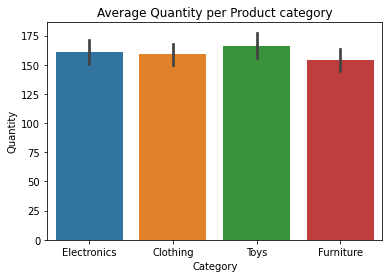

In [768]:
sns.barplot(data=df,x='Category',y='Quantity')
plt.title('Average Quantity per Product category');#The average quantity per category varies only slightly.The 
#Furniture category has the lowest average quantities, potentially indicating less demand or higher turnover

### 2.products frequently out of stock

In [769]:
out_stock = df.query('Status=="Out of Stock"')
out_stock

,Product_ID,Product_Name,Category,Warehouse,Location,Quantity,Price,Supplier,Status,Last_Restocked
1,1435,Gadget Y,Electronics,Warehouse 2,Aisle 4,200.0,19.99,Supplier C,Out of Stock,2024-09-12 07:54:41.921721
4,1106,Widget A,Furniture,Warehouse 3,Aisle 3,200.0,9.99,Supplier D,Out of Stock,2023-04-25 00:00:00.000000
7,1020,Widget C,Clothing,Warehouse 1,Aisle 5,200.0,9.99,Supplier D,Out of Stock,2022-12-20 00:00:00.000000
8,1614,Gadget Y,Electronics,Warehouse 3,Aisle 3,300.0,9.99,Supplier B,Out of Stock,2023-05-03 00:00:00.000000
9,1121,Widget B,Toys,Warehouse 1,Aisle 2,50.0,19.99,Supplier C,Out of Stock,2022-12-20 00:00:00.000000
...,...,...,...,...,...,...,...,...,...,...
988,1593,Widget B,Clothing,Warehouse 1,Aisle 1,100.0,29.99,Supplier A,Out of Stock,2023-04-25 00:00:00.000000
989,1882,Gadget X,Furniture,Warehouse 2,Aisle 5,200.0,9.99,Supplier D,Out of Stock,2023-05-03 00:00:00.000000
993,1920,Gadget Y,Furniture,Warehouse 1,Aisle 5,100.0,29.99,Supplier A,Out of Stock,2023-01-15 00:00:00.000000
994,1449,Gadget X,Furniture,Warehouse 2,Aisle 3,150.0,29.99,Supplier B,Out of Stock,2024-09-12 07:54:41.921721


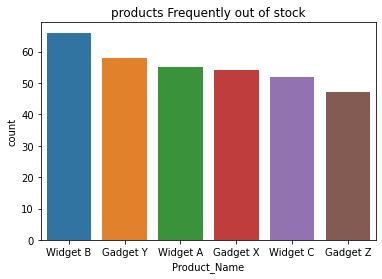

In [770]:
sns.countplot(data=out_stock, x='Product_Name',order=out_stock['Product_Name'].value_counts().index)
plt.title('products Frequently out of stock');#Analysis shows that certain products(especially widget B) are 
#more frequently out of stock.These coul indicate high demand,supply chain issues or insufficient stock management.
#These products may require close monitoring to avoid stockouts

### 3.Most restocked products and their suppliers

In [771]:
in_stock = df.query('Status=="In Stock"')
in_stock

,Product_ID,Product_Name,Category,Warehouse,Location,Quantity,Price,Supplier,Status,Last_Restocked
0,1102,Gadget Y,Electronics,Warehouse 2,Aisle 1,300.0,9.99,Supplier C,In Stock,2024-09-12 07:54:41.921721
2,1860,Widget A,Clothing,Warehouse 2,Aisle 3,100.0,19.99,Supplier B,In Stock,2022-12-20 00:00:00.000000
3,1270,Gadget Z,Toys,Warehouse 2,Aisle 4,50.0,49.99,Supplier B,In Stock,2022-12-20 00:00:00.000000
5,1071,Widget B,Clothing,Warehouse 3,Aisle 5,300.0,29.99,Supplier A,In Stock,2022-12-20 00:00:00.000000
6,1700,Widget A,Clothing,Warehouse 2,Aisle 2,200.0,49.99,Supplier B,In Stock,2022-12-20 00:00:00.000000
...,...,...,...,...,...,...,...,...,...,...
986,1252,Gadget Y,Clothing,Warehouse 3,Aisle 4,200.0,29.99,Supplier A,In Stock,2023-05-03 00:00:00.000000
990,1255,Widget B,Clothing,Warehouse 2,Aisle 4,150.0,9.99,Supplier B,In Stock,2023-04-25 00:00:00.000000
992,1814,Gadget Y,Electronics,Warehouse 3,Aisle 1,150.0,19.99,Supplier B,In Stock,2024-09-12 07:54:41.921721
995,1009,Widget B,Furniture,Warehouse 2,Aisle 2,100.0,29.99,Supplier C,In Stock,2023-01-15 00:00:00.000000


Text(0.5, 1.0, 'Most restocked products and their supplies')

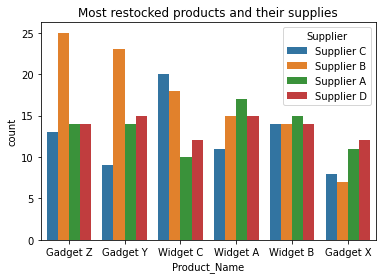

In [772]:
sns.countplot(data=in_stock, x='Product_Name',hue='Supplier',order=in_stock['Product_Name'].value_counts().index)
plt.title('Most restocked products and their supplies')

### B.Supplier Analysis
understanding the role of suppliers is vital for optimising stock levels and ensurng a reliable supply chain.The analysis revealed the no of products provided by each supplier, highlighted suppliers with frequent restocking events, and analysed the depedency of specific suppliers
### Supplier Analysis Insights:
### 1.Number of prodcusts supplied by each supplier

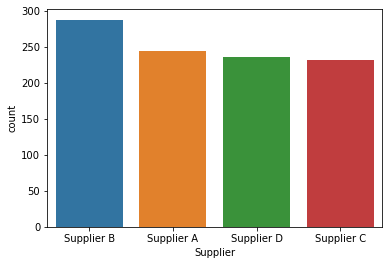

In [773]:
sns.countplot(data=df, x='Supplier',order=df['Supplier'].value_counts().index); #The distribution of products supplied by different
#suppliers is only slightly uneven, with supplier B providing significantly more products
#This could indicate reliance on supplier B,which may impact supply chain reliance

### 2.Average Restock Time per Supplier

In [774]:
#Add year column
df['Year'] = df['Last_Restocked'].dt.year

In [782]:
supplier_count = df.pivot_table(index='Year',columns='Supplier',aggfunc='size')
supplier_count

Supplier,Supplier A,Supplier B,Supplier C,Supplier D
Year,,,,
2022,53,60,58,47
2023,145,166,130,141
2024,46,62,44,48


<AxesSubplot:xlabel='Year'>

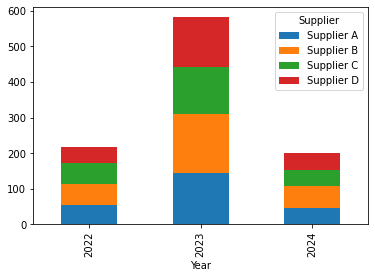

In [784]:
supplier_count.plot(kind='bar',stacked=True)

### 3.Dependency on Specific suppliers

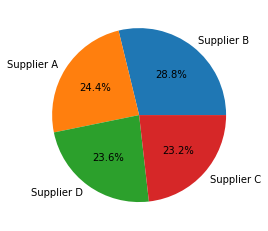

In [788]:
suppliers_count = df['Supplier'].value_counts()
plt.pie(suppliers_count,labels=suppliers_count.index,autopct='%1.1f%%');#The pie chart illustrates the proportion
#of products supplied by each supplier.A significant dependency on supplier B is evident, with the proportion of products
#supplied by them being approximately 29%. This might pose a risk if any of these suppliers' face disruptions

### C. Stock Trends Analysis
The analysis of stock trends over time, broken down by categories, suppliers and warehouses provided
a comprehensive view of how stock levels fluctuate
These trends are useful for making informed decisions about inventoty management, restocking schediles and optimising warehouse opererations. By comparing stock trends across different dimesnions,businessses can identify patterns and address issues proactively

### Trends in Stock Levels Over Time:

In [816]:
#df['Month'] = df['Last_Restocked'].dt.month_name()
df['Month'] = df['Last_Restocked'].dt.to_period('M')
monthly_data = df.groupby('Month')['Quantity'].sum()
monthly_data

Month
2022-12    33500.0
2023-01    32850.0
2023-04    31000.0
2023-05    30900.0
2024-09    31350.0
Freq: M, Name: Quantity, dtype: float64

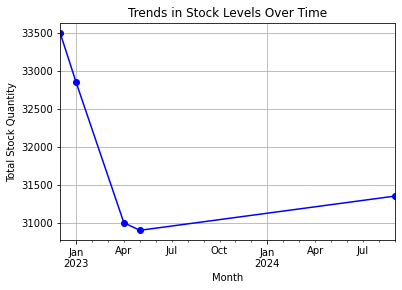

In [820]:
monthly_data.plot(kind='line',marker='o',color='b')
plt.title('Trends in Stock Levels Over Time')
plt.xlabel('Month')
plt.ylabel('Total Stock Quantity')
plt.grid(True);
#The line chart illustrates the overall trend in stock levels over time aggregated by month.below are the observations:
#1. Slunctuations in stock levels=They are visible fluctuations in the stock levels, with January of 2023 being the period that has the highest restocking activity followed by consumption or sales
#2.sock managemenet Insight:understanding these trends can aid in optimising restocking schedules and ensuring that stock levels are maintained more consistently throughout the year, preventing stockouts or overstock situations

### Trends in Stock levels over time by category:

In [831]:
stock_trend_by_category = df.groupby(['Month','Category'])['Quantity'].sum().unstack()
stock_trend_by_category

Category,Clothing,Electronics,Furniture,Toys
Month,,,,
2022-12,8400.0,9150.0,8950.0,7000.0
2023-01,8250.0,7050.0,10050.0,7500.0
2023-04,7600.0,8300.0,7450.0,7650.0
2023-05,8400.0,6700.0,7700.0,8100.0
2024-09,8150.0,8600.0,6600.0,8000.0


<AxesSubplot:xlabel='Month'>

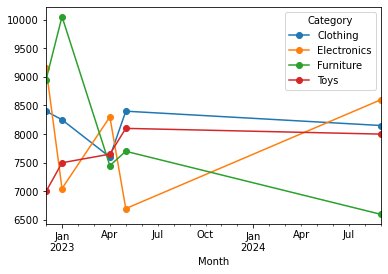

In [833]:
stock_trend_by_category.plot(kind='line',marker='o')
#The line chart shows the stock trend for different categories over time. Key observations include:
#1.category specific fluctuation:each cat has diffrent trends with some showing more stabiity in stock levels, while others experience significant fluctuations
#2Toys and clothing.seem to have a more consistent restockng patterns, though they alsp exhibit noticeable peaks and throughts at certain times
#3. Electronics and furniture:show more pronunced variablity with distict peaks and dips possibly reflecting seasonality or varying demand

### D.Warehouse utilisation
analysed by examining stock trends across different warehouses. This analysis provides insights into how
each warehouse contributes to overall stock management,highlighting periods of high activity and identifying potential areas for optimisation
### Trends in Stock Levels over time by warehouse

In [837]:
stock_trend_warehouse =  df.groupby(['Month','Warehouse'])['Quantity'].sum().unstack()
stock_trend_warehouse

Warehouse,Warehouse 1,Warehouse 2,Warehouse 3
Month,,,
2022-12,11100.0,11850.0,10550.0
2023-01,12350.0,9150.0,11350.0
2023-04,12050.0,10300.0,8650.0
2023-05,9200.0,8550.0,13150.0
2024-09,11150.0,12400.0,7800.0


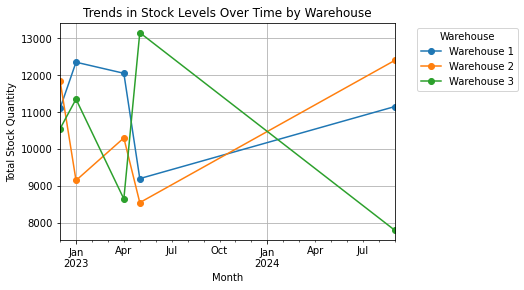

In [843]:
stock_trend_warehouse.plot(kind='line',marker='o')
plt.title('Trends in Stock Levels Over Time by Warehouse')
plt.xlabel('Month')
plt.ylabel('Total Stock Quantity')
plt.legend(title='Warehouse', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True); #The line chart shows stock tremds across diffrenet warehouses over time.Here are the key observations
#1.Warehouse 2 appears to maintain relatively stable stock leverls, though it has experienced fluctuations that might correspond to specific restocking events or high-demand period
#2.warehouse 1.shows more variablity in stock levels, with some noticeable peaks and troughs, indictaing periods of increased activity or demand
#3.Warehouse 3: seems to have most dynamic stock levels, with significant fluctuations
#4.Comparison:The comparison shows that each warehouse has its own unique trend, likely influenced by the types of products stored, the role of the warehouse in the overall logistics network, and possibly regional demand differences.

### Trends in stock levels over time by supplier

In [845]:
stock_trend_supplier =  df.groupby(['Month','Supplier'])['Quantity'].sum().unstack()
stock_trend_supplier

Supplier,Supplier A,Supplier B,Supplier C,Supplier D
Month,,,,
2022-12,8500.0,8850.0,8750.0,7400.0
2023-01,7250.0,10100.0,8100.0,7400.0
2023-04,7300.0,9650.0,5800.0,8250.0
2023-05,8250.0,7800.0,7100.0,7750.0
2024-09,7600.0,8200.0,7050.0,8500.0


<AxesSubplot:xlabel='Month'>

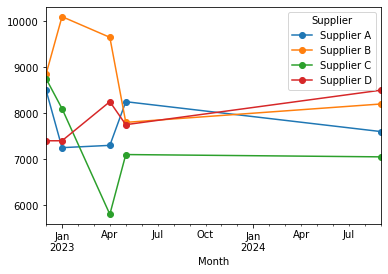

In [846]:
stock_trend_supplier.plot(kind='line',marker='o');

The line chart compares stock trends across different suppliers over time. Here are some insights:

Distinct Patterns for Each Supplier:
- Each supplier exhibits unique stock trends, reflecting differences in their supply schedules, product demand, or the variety of products they provide.
- Supplier A and Supplier D:
These suppliers show relatively consistent stock levels over time, with minor fluctuations. This could indicate steady supply and demand for the products they provide.
- Supplier C:
This supplier shows more significant fluctuations, with periods of high restocking followed by sharp declines. This could be due to high demand for specific products, irregular restocking, or seasonal effects.
- Supplier B:
Supplier B seems to have the most volatile trend, with sharp peaks and valleys, possibly indicating challenges in maintaining consistent stock levels or varying demand for their products.

### Summary of warehouse analysis
The analysis carried out above is by no means exhaustive but does provide a good starting point for further detailed analyses into specific aspects of the warehouse management data.

However, several key takeaways can be derived from the analysis performed so far.

### Key observations
- Category and Product Management: Certain categories, such as Electronics and Furniture, maintain more stable stock levels, while others like Clothing and Toys show more volatility.
This suggests that some categories might benefit from more dynamic stock management strategies to prevent stockouts.
- Supplier Dependency: The analysis revealed a significant dependency on a few key suppliers.
This concentration poses a risk if these suppliers face supply chain disruptions. Diversifying the supplier base could help mitigate this risk.
- Warehouse Utilisation: Different warehouses exhibit unique stock level trends, with some showing significant fluctuations.
Understanding these trends allows for better space utilisation and inventory distribution across warehouses.
- Stock Trends: The analysis of stock trends over time indicates that certain products and suppliers follow specific restocking patterns.
Recognising these patterns can help in scheduling restocks more effectively and reducing the risk of stockouts.
### Suggestions for Improvement at the Warehouse
- Dynamic Inventory Management:
Implement more dynamic inventory management practices that adjust stock levels based on real-time demand and sales forecasts.
This can help prevent stockouts, especially for high-demand products.
- Supplier Diversification:
Consider diversifying the supplier base to reduce dependency on a few key suppliers.
This will improve supply chain resilience and reduce the risk of disruptions.
- Warehouse Optimisation:
Review warehouse utilisation to optimise space and ensure that high-demand products are easily accessible.
Implementing advanced warehouse management systems (WMS) can aid in better space utilisation and inventory tracking.
- Data-Driven Decision Making:
Utilise the insights gained from stock trends to inform decision-making. Regularly monitor these trends to adjust inventory policies, restocking schedules, and supplier relationships.
- Seasonal Planning:
Given the observed fluctuations in certain categories, implementing seasonal planning can help manage inventory levels more effectively.
Adjust stock levels ahead of peak seasons based on historical data.
### Conclusion
This basic yet detailed analysis of warehouse stock trends offers valuable insights into the dynamics of warehouse management.

By understanding how different factors such as product categories, suppliers, and warehouses impact stock levels, businesses can make more informed decisions, optimise their supply chains, and improve overall efficiency.

Whether it’s managing stockouts, enhancing supplier relationships, or optimising warehouse space, the insights gained from this analysis can lead to more effective and strategic warehouse management.